In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satelite/data/labels/38_68.png
/kaggle/input/satelite/data/labels/121_142.png
/kaggle/input/satelite/data/labels/173.png
/kaggle/input/satelite/data/labels/248.png
/kaggle/input/satelite/data/labels/94.png
/kaggle/input/satelite/data/labels/40_277.png
/kaggle/input/satelite/data/labels/18_42.png
/kaggle/input/satelite/data/labels/236.png
/kaggle/input/satelite/data/labels/85_117.png
/kaggle/input/satelite/data/labels/48.png
/kaggle/input/satelite/data/labels/23_251.png
/kaggle/input/satelite/data/labels/227.png
/kaggle/input/satelite/data/labels/97_130.png
/kaggle/input/satelite/data/labels/238.png
/kaggle/input/satelite/data/labels/61.png
/kaggle/input/satelite/data/labels/222.png
/kaggle/input/satelite/data/labels/108_236.png
/kaggle/input/satelite/data/labels/278.png
/kaggle/input/satelite/data/labels/62_187.png
/kaggle/input/satelite/data/labels/303.png
/kaggle/input/satelite/data/labels/37.png
/kaggle/input/satelite/data/labels/231.png
/kaggle/input/satelite/data/lab

In [50]:
import os
import numpy as np
from tifffile import imread
from PIL import Image

images_dir = "/kaggle/input/satelite/data/images"
labels_dir = "/kaggle/input/satelite/data/labels"

# List files (assuming matching names, e.g. img1.tif <-> img1.png)
image_files = sorted([f for f in os.listdir(images_dir)])
label_files = sorted([f for f in os.listdir(labels_dir)])

# Read them
images = []
labels = []

for img_file, lbl_file in zip(image_files, label_files):
    # Read .tif (keeps all channels)
    img_path = os.path.join(images_dir, img_file)
    img = imread(img_path)  # shape could be (H, W, C) or (C, H, W), depends on dataset
    images.append(img.astype(np.float32))

    # Read label (grayscale or RGB depending on dataset)
    lbl_path = os.path.join(labels_dir, lbl_file)
    lbl = np.array(Image.open(lbl_path))  # usually (H, W)
    labels.append(lbl)

# Convert to numpy arrays
images = np.stack(images)
labels = np.stack(labels)

print("Images shape:", images.shape)  # (N, H, W, C)
print("Labels shape:", labels.shape)  # (N, H, W) or (N, H, W, 3)

Images shape: (306, 128, 128, 12)
Labels shape: (306, 128, 128)


In [51]:
images_bgr = images[:, :, :, 1:4]
images_rgb = images_bgr[:, :, :, [2, 1, 0]]
images_rgb = np.array([(im - im.min()) / (im.max() - im.min()) for im in images_rgb])
print("Images shape:", images_rgb.shape)

Images shape: (306, 128, 128, 3)


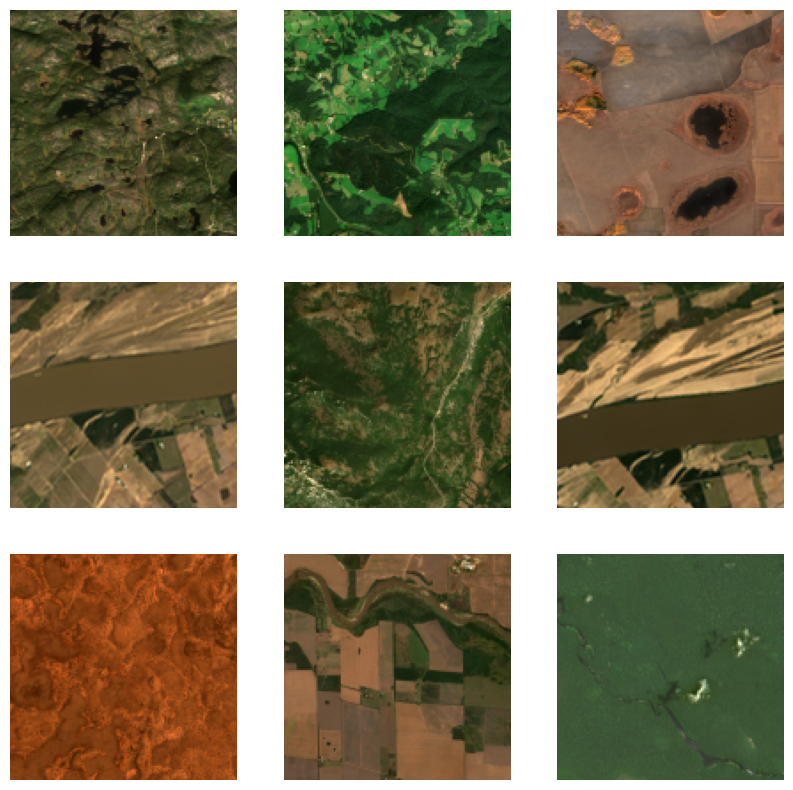

In [52]:
import matplotlib.pyplot as plt

n = 9
plt.figure(figsize=(10,10))

for i in range(n):
    plt.subplot(3,3,i+1)   # 3x3 grid
    img = images_rgb[i]
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [53]:
import numpy as np

# Suppose images is (N, H, W, C)
N, H, W, C = images.shape

channel_means = []
channel_stds  = []
channel_mins  = []
channel_maxs  = []

for c in range(C):
    vals = images[..., c].ravel()
    channel_means.append(np.mean(vals))
    channel_stds.append(np.std(vals))
    channel_mins.append(np.min(vals))
    channel_maxs.append(np.max(vals))

print("Channel | Mean | Std | Min | Max")
for c in range(C):
    print(f"{c:7d} | {channel_means[c]:.2f} | {channel_stds[c]:.2f} | {channel_mins[c]:.2f} | {channel_maxs[c]:.2f}")


Channel | Mean | Std | Min | Max
      0 | 396.47 | 270.07 | -1393.00 | 6568.00
      1 | 494.62 | 325.98 | -1169.00 | 9659.00
      2 | 822.32 | 418.12 | -722.00 | 11368.00
      3 | 973.67 | 586.70 | -684.00 | 12041.00
      4 | 2090.11 | 1055.98 | -412.00 | 15841.00
      5 | 1964.05 | 1191.42 | -335.00 | 15252.00
      6 | 1351.27 | 961.76 | -258.00 | 14647.00
      7 | 102.74 | 48.80 | 64.00 | 255.00
      8 | 141.80 | 1364.98 | -9999.00 | 4245.00
      9 | 300.74 | 496.04 | 8.00 | 4287.00
     10 | 35.10 | 20.18 | 10.00 | 100.00
     11 | 9.75 | 27.76 | 0.00 | 111.00


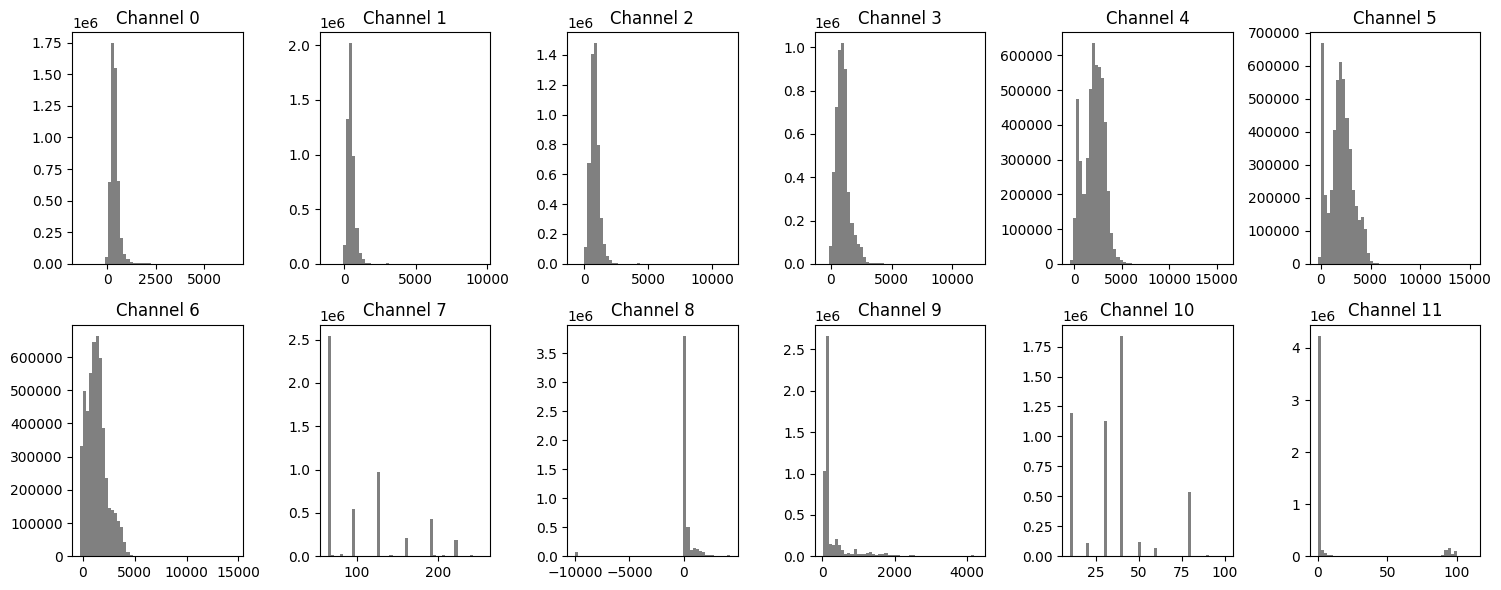

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for c in range(C):
    plt.subplot(2, (C+1)//2, c+1)
    plt.hist(images[..., c].ravel(), bins=50, color="gray")
    plt.title(f"Channel {c}")
plt.tight_layout()
plt.show()

In [55]:
has_nodata = [(img[..., 8] == -9999).any() for img in images]
bad_indices = [i for i, flag in enumerate(has_nodata) if flag]
print("Images with -9999 in channel 8:", bad_indices)

Images with -9999 in channel 8: [73, 125, 130, 142, 163, 196, 278]


In [56]:
DEM = images[...,8]

for i in range(DEM.shape[0]):
    valid = DEM[i][DEM[i] != -9999]
    if valid.size > 0:
        mean_val = np.mean(valid)
        DEM[i][DEM[i] == -9999] = mean_val
    else:
        DEM[i][:] = 0  # fallback if all nodata
        
images[..., 8] = DEM

images_preprocessed = np.delete(images, [7, 10], axis=-1)

print("Processed shape:",images_preprocessed.shape)

Processed shape: (306, 128, 128, 10)


In [57]:
mins = images_preprocessed.reshape(-1, images_preprocessed.shape[-1]).min(axis=0)
maxs = images_preprocessed.reshape(-1, images_preprocessed.shape[-1]).max(axis=0)

images_norm = (images_preprocessed - mins) / (maxs - mins + 1e-8)

print("Normalized shape:",images_norm.shape)

Normalized shape: (306, 128, 128, 10)


In [58]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, 3, padding='same', activation='relu')(x)
    return x


inputs = layers.Input((128,128,10))

c1 = conv_block(inputs, 64)
p1 = layers.MaxPool2D((2,2))(c1)

c2 = conv_block(p1, 128)
p2 = layers.MaxPool2D((2,2))(c2)

c3 = conv_block(p2, 256)
p3 = layers.MaxPool2D((2,2))(c3)

c4 = conv_block(p3, 512)
p4 = layers.MaxPool2D((2,2))(c4)

bn = conv_block(p4, 1024)

u1 = layers.UpSampling2D((2,2))(bn)
u1 = layers.Concatenate()([u1, c4])
c5 = conv_block(u1, 512)

u2 = layers.UpSampling2D((2,2))(c5)
u2 = layers.Concatenate()([u2, c3])
c6 = conv_block(u2, 256)

u3 = layers.UpSampling2D((2,2))(c6)
u3 = layers.Concatenate()([u3, c2])
c7 = conv_block(u3, 128)

u4 = layers.UpSampling2D((2,2))(c7)
u4 = layers.Concatenate()([u4, c1])
c8 = conv_block(u4, 64)

outputs = layers.Conv2D(1, 1, activation='sigmoid')(c8)

model = Model(inputs, outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 10)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_57 (Conv2D)  │ (None, 128, 128,  │      5,824 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_58 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_57[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 64, 64,    │          0 │ conv2d_58[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_59 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_12… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_60 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_59[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 32, 32,    │          0 │ conv2d_60[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_61 (Conv2D)  │ (None, 32, 32,    │    295,168 │ max_pooling2d_13… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_62 (Conv2D)  │ (None, 32, 32,    │    590,080 │ conv2d_61[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 16, 16,    │          0 │ conv2d_62[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_14… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 16, 16,    │  2,359,808 │ conv2d_63[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 8, 8, 512) │          0 │ conv2d_64[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_15… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 8, 8,      │  9,438,208 │ conv2d_65[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_12    │ (None, 16, 16,    │          0 │ conv2d_66[0][0]   │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 16, 16,    │          0 │ up_sampling2d_12

 Total params: 31,382,977 (119.72 MB)

 Trainable params: 31,382,977 (119.72 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
def dice_loss(y_true, y_pred):
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return 1 - (2 * intersection / union)

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=dice_loss,
    metrics=[tf.keras.metrics.MeanIoU(num_classes=2)]
)

In [74]:
print("Images shape: ",images_norm.shape)
labels = labels[...,None]
print("Labels shape: ",labels.shape)

Images shape:  (306, 128, 128, 10)
Labels shape:  (306, 128, 128, 1, 1)


In [75]:
history = model.fit(
    images_norm, labels,   
    batch_size=8,
    epochs=50
)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - loss: 0.5953 - mean_io_u_4: 0.3765
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.5085 - mean_io_u_4: 0.3822
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4960 - mean_io_u_4: 0.3778
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.5452 - mean_io_u_4: 0.2901
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4922 - mean_io_u_4: 0.4162
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4824 - mean_io_u_4: 0.4102
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.5168 - mean_io_u_4: 0.4280
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4754 - mean_io_u_4: 0.4259
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4633 - mean_io_u_4: 0.4507
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4778 - mean_io_u_4: 0.3246
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.4760 - mean_io_u_4: 0.3922
Epoch 12/50
39/39 ━━━━━━━━━━

In [76]:
y_pred = model.predict(images_norm)
y_pred_bin = (y_pred > 0.5).astype("uint8")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step


In [77]:
y_true_flat = labels.flatten()
y_pred_flat = y_pred_bin.flatten()

print("True labels shape: ",y_true_flat.shape)
print("Predict labels shape: ",y_pred_flat.shape)

True labels shape:  (5013504,)
Predict labels shape:  (5013504,)


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

iou = jaccard_score(y_true_flat, y_pred_flat)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)

print(f"IoU: {iou:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

IoU: 0.5628
Precision: 0.6130
Recall: 0.8729
F1-score: 0.7202
